In [1]:
import numpy as np
import matplotlib.pyplot as plt

A quick example of the code used for simulating traffic in first year project.
For further analysis and rule tweaking see full report at github.com/ceqv

In [2]:
def update(Lane,max_v=5,brake_chance=0):
    N = len(Lane)
    Lane_new = Lane.copy()*0
    total_movement = 0
    for i,v in enumerate(Lane):
        if v>0:
            Lane_new[(i+v)%N] = min(v+1,max_v) #All cars accelerate
    for i,v in enumerate(Lane_new):
        if v>0:
            dist = 1
            while dist<v:
                if Lane_new[(i+dist)%N]>0:
                    Lane_new[i] = dist
                    break
                dist += 1
            if np.random.random()<brake_chance:
                Lane_new[i]= max(Lane_new[i]-1,1)
    return Lane_new

def Traffic_simul(rho,max_v,eps,N=100,t=300):
    density = rho
    max_v = max_v
    brake_chance = eps
    Start_Lane = np.random.choice([0,1],size=N,p=[1-density,density])
    N_cars = np.sum(Start_Lane>0)
    lanes = np.zeros((t,N))
    Lane = Start_Lane.copy()
    for i in range(t):
        lanes[i] = Lane
        Lane = update(Lane,max_v,eps)
    return lanes

def Flow(lanes):
    return np.sum(lanes,axis=1)

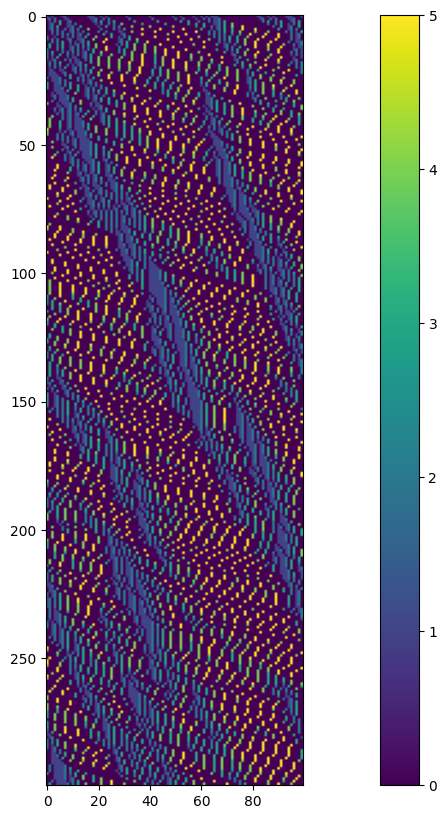

In [3]:
lanes = Traffic_simul(0.3,5,0.2)
plt.figure(figsize=(20,10))
plt.imshow(lanes)
plt.colorbar()